In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/My\ Drive/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

# Baseline CNN model



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = RMSprop(lr=0.0001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)            

In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train, steps_per_epoch=len(train), validation_data=test, validation_steps=len(test), epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 143s 1s/step - loss: 1.4651 - accuracy: 0.5732 - val_loss: 0.5868 - val_accuracy: 0.6803
Epoch 2/20
100/100 [==============================] - 143s 1s/step - loss: 0.5946 - accuracy: 0.6778 - val_loss: 0.6287 - val_accuracy: 0.6292
Epoch 3/20
100/100 [==============================] - 142s 1s/step - loss: 0.5514 - accuracy: 0.7200 - val_loss: 0.5726 - val_accuracy: 0.6927
Epoch 4/20
100/100 [==============================] - 142s 1s/step - loss: 0.5170 - accuracy: 0.7412 - val_loss: 0.4537 - val_accuracy: 0.7882
Epoch 5/20
100/100 [==============================] - 142s 1s/step - loss: 0.4793 - accuracy: 0.7721 - val_loss: 0.4707 - val_accuracy: 0.7855
Epoch 6/20
100/100 [==============================] - 142s 1s/step - loss: 0.4568 - accuracy: 0.7854 - val_loss: 0.4432 - val_accuracy: 0.7944
Epoch 7/20
100/100 [==============================] - 141s 1s/step

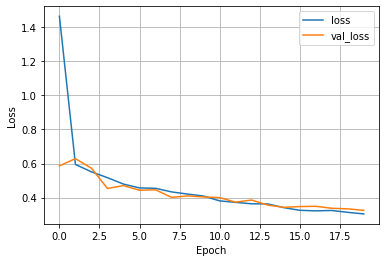

In [ ]:
plot_loss(history_base_model)

In [ ]:
loss, accuracy = model.evaluate(test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

18/18 - 6s - loss: 0.3252 - accuracy: 0.8637
Test accuracy: 0.8636767268180847
Test loss: 0.32523369789123535


sweetspot pada cats n dog 0.001 sweetspotnya ada pada epoch 56

# Assignment

1. Tambahkan convolution layer berikut untuk data yang sudah dilakukan data augmentation:

    - Convolution layer dengan 32 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 64 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2
    - Convolution layer dengan 128 filters, kernel size 3x3, activation function ReLu, & nilai awal berdasarkan he_uniform
    - Max Pooling Layer 2x2

  Bandingkan hasil accuracy yang didapat dengan ketika training dilakukan dengan model baseline! Jelaskan kesimpulannya! Gunakan nilai epoch 100. Lalu bandingkan juga plot epoch terhadap lossnya!

2. Tentukan arsitektur CNN serta hyperparameter tuning bagi mendapatkan hasil terbaik untuk dataset ini!